# TA2: Marathi Handwriting/Text Recognition using Transformer-based OCR + NLP

## Steps to Follow:

> 1. **Capture or upload** an image of a handwritten page written in your mother tongue.

> 2. **Preprocess the image** to improve clarity (e.g., convert to grayscale, resize, denoise).

> 3.  **Use OCR** to extract text from the image (e.g., Transformer based OCR with language pack for your language).

> 4. **Normalize** the extracted text (remove noise, unwanted characters, fix encoding issues).

> 5. **Tokenize** the text using an appropriate NLP tokenizer for your language.

> 6. **Marathi Named Entity Recognition (NER)**, Perform Named Entity Recognition on the extracted Marathi text to identify entities such as names of people, places, organizations, dates, etc.

> 7. **Performing NLP task**, such as:
>    - Language detection
>    - Translation

> 8. **Display the final output** in a readable format (console, notebook cell, or GUI).

> 9. **Sentiment Analysis:**  
   Analyze the sentiment (positive, negative, or neutral) of the text extracted through OCR to understand the emotional tone of the content.


> 10. **Summarization** of the extracted text


### Step 0: Install & Import Required Libraries


In [ ]:
# Install All Required Python Libraries

!pip install gdown
!pip install indic-nlp-library
!pip install pytesseract
!pip install opencv-python-headless
!pip install googletrans==4.0.0-rc1
!pip install deep-translator
!pip install langdetect

# Update and Install All Required Libraries and Tools

!sudo apt-get update
!sudo apt-get upgrade
!sudo apt-get install -y tesseract-ocr
!sudo apt-get install -y tesseract-ocr-mar
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 2

In [ ]:
# Import All Required Libraries

import gdown
from google.colab import files
from PIL import Image
import numpy as np
import cv2
import torch
import pytesseract
import re
import pandas as pd
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from indicnlp.tokenize.indic_tokenize import trivial_tokenize
from langdetect import detect

!huggingface-cli clear-cache

from huggingface_hub import login
login()

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


### Step 1: Upload Image

In [ ]:
# Option for the user to try dynamic upload quickly
user_choice = input("Would you like to skip static image and upload a dynamic image? (y/n) [default: n]: ").strip().lower()

if user_choice == 'y':
    print("Proceeding with dynamic image upload...")
    # Dynamic Image Uploads
    uploaded = files.upload()  # Upload image from user
    filename = list(uploaded.keys())[0]  # Get the name of the uploaded file

    # Open image with PIL
    img_pil = Image.open(filename)
    img_pil.show()

else:
    # Static Image Uploads
    file_id = '1z526YFcKb2g8HftFLPhH9Gg25I-jNtHh'  # Extract the file ID from the shared link
    url = f'https://drive.google.com/uc?export=download&id={file_id}'

    try:
        # Try downloading the static image using gdown
        gdown.download(url, 'marathi.gif', quiet=False)

        # Open the image with PIL
        img_pil = Image.open('marathi.gif')
        img_pil.show()

    except Exception as e:
        # If static image download fails, handle with dynamic image upload
        print(f"Static image download failed with error: {e}")
        print("Proceeding with dynamic image upload...")

        # Dynamic Image Uploads
        uploaded = files.upload()  # Upload image from user
        filename = list(uploaded.keys())[0]  # Get the name of the uploaded file

        # Open image with PIL
        img_pil = Image.open(filename)
        img_pil.show()

Would you like to skip static image and upload a dynamic image? (y/n) [default: n]: n


Downloading...
From: https://drive.google.com/uc?export=download&id=1z526YFcKb2g8HftFLPhH9Gg25I-jNtHh
To: /content/marathi.gif
100%|██████████| 7.23k/7.23k [00:00<00:00, 14.4MB/s]


### Step 2: Preprocess Image

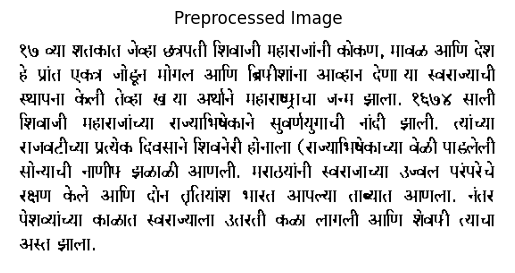

In [ ]:
# Convert PIL to OpenCV format
img_cv = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Preprocess image
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Show the preprocessed image
plt.imshow(thresh, cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()

### Step 3: Transformer based OCR Extraction

#### TrOCR

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# Load the pre-trained TrOCR model and processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model.eval()  # inference mode only

# Optional: use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 1: Load or convert the image
# If using OpenCV image (NumPy array), convert to PIL
if isinstance(img_pil, np.ndarray):
    img_pil_ = Image.fromarray(img_pil)

# Step 2: Preprocess (resize and RGB)
img_pil_ = img_pil.convert("RGB")
img_pil_ = img_pil_.resize((384, 384))

# Step 3: Feature extraction
pixel_values = processor(images=img_pil_, return_tensors="pt").pixel_values.to(device)

# Step 4: Generate text from image
with torch.no_grad():
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("\n📝 OCR Text with TrOCR:\n", generated_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.1"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


📝 OCR Text with TrOCR:
 1957 58


#### Abhi964/MahaPhrase_mahaBERTv2_Finetuning

In [ ]:
# Use pytesseract for raw text
ocr_text = pytesseract.image_to_string(thresh, lang="mar")

# Run through l3cube-pune/marathi-bert-v2 for context-aware prediction
from transformers import pipeline
ocr_model = pipeline("text-classification", model="Abhi964/MahaPhrase_mahaBERTv2_Finetuning", tokenizer="Abhi964/MahaPhrase_mahaBERTv2_Finetuning")
ocr_result = ocr_model(ocr_text)

print("\n📜 OCR Text:\n", ocr_text)
print("\n🔍 MahaBERT Inference:\n", ocr_result)

config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/950M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

Device set to use cpu



📜 OCR Text:
 १७ व्या शतकात जेव्हा छत्रपती शिवाजी महाराजांनी कोकण, मावळ आणि देश
हे प्रांत एकज जोडून मोगल आणि ब्रिपीशांना आव्हान देणा या स्वराज्याची
स्थापना केली तेव्हा ख या अर्थाने महाराष्यराचा जन्म झाला. ९६७४ साली
शिवाजी महाराजांच्या राज्याभिषेकाने सुवर्णयुगाची नांदी झाली. त्यांच्या
राजबटीच्या प्रत्येक दिवसाने शिवनेरी होनाला (राज्याभिषेकाच्या वेळी पाडलेली
सोन्याची नाणीप झळाळी आणली. मराठयांनी स्वराजाच्या उग्जल परंपरेचे
रक्षण केले आणि दोन तृतियांश भारत आपल्या ताब्यात आणला. नंतर
पेशव्यांच्या काळात स्वराज्याला उत्तरती कळा लागली आणि शेबपी त्याचा
अस्त झाला.


🔍 MahaBERT Inference:
 [{'label': 'LABEL_0', 'score': 0.969126284122467}]


### Step 4: Normalize Text

In [ ]:
# Normalize the OCR output
normalized_text = re.sub(r'[^\u0900-\u097F\s]', '', ocr_text)
normalized_text = re.sub(r'\s+', ' ', normalized_text).strip()
print("\nNormalized Marathi Text:\n", normalized_text)


Normalized Marathi Text:
 १७ व्या शतकात जेव्हा छत्रपती शिवाजी महाराजांनी कोकण मावळ आणि देश हे प्रांत एकज जोडून मोगल आणि ब्रिपीशांना आव्हान देणा या स्वराज्याची स्थापना केली तेव्हा ख या अर्थाने महाराष्यराचा जन्म झाला ९६७४ साली शिवाजी महाराजांच्या राज्याभिषेकाने सुवर्णयुगाची नांदी झाली त्यांच्या राजबटीच्या प्रत्येक दिवसाने शिवनेरी होनाला राज्याभिषेकाच्या वेळी पाडलेली सोन्याची नाणीप झळाळी आणली मराठयांनी स्वराजाच्या उग्जल परंपरेचे रक्षण केले आणि दोन तृतियांश भारत आपल्या ताब्यात आणला नंतर पेशव्यांच्या काळात स्वराज्याला उत्तरती कळा लागली आणि शेबपी त्याचा अस्त झाला


### Step 5: Tokenization

In [ ]:
# Tokenization

# Simple whitespace tokenizer
tokens_simple = normalized_text.split()
print("\nTokenized Words (Simple Split):\n", tokens_simple)

# Advanced Indic NLP tokenizer
tokens_advanced = trivial_tokenize(normalized_text, lang='mar')
print("\nTokenized Words (Indic NLP):\n", tokens_advanced)

tokens = tokens_advanced


Tokenized Words (Simple Split):
 ['१७', 'व्या', 'शतकात', 'जेव्हा', 'छत्रपती', 'शिवाजी', 'महाराजांनी', 'कोकण', 'मावळ', 'आणि', 'देश', 'हे', 'प्रांत', 'एकज', 'जोडून', 'मोगल', 'आणि', 'ब्रिपीशांना', 'आव्हान', 'देणा', 'या', 'स्वराज्याची', 'स्थापना', 'केली', 'तेव्हा', 'ख', 'या', 'अर्थाने', 'महाराष्यराचा', 'जन्म', 'झाला', '९६७४', 'साली', 'शिवाजी', 'महाराजांच्या', 'राज्याभिषेकाने', 'सुवर्णयुगाची', 'नांदी', 'झाली', 'त्यांच्या', 'राजबटीच्या', 'प्रत्येक', 'दिवसाने', 'शिवनेरी', 'होनाला', 'राज्याभिषेकाच्या', 'वेळी', 'पाडलेली', 'सोन्याची', 'नाणीप', 'झळाळी', 'आणली', 'मराठयांनी', 'स्वराजाच्या', 'उग्जल', 'परंपरेचे', 'रक्षण', 'केले', 'आणि', 'दोन', 'तृतियांश', 'भारत', 'आपल्या', 'ताब्यात', 'आणला', 'नंतर', 'पेशव्यांच्या', 'काळात', 'स्वराज्याला', 'उत्तरती', 'कळा', 'लागली', 'आणि', 'शेबपी', 'त्याचा', 'अस्त', 'झाला']

Tokenized Words (Indic NLP):
 ['१७', 'व्या', 'शतकात', 'जेव्हा', 'छत्रपती', 'शिवाजी', 'महाराजांनी', 'कोकण', 'मावळ', 'आणि', 'देश', 'हे', 'प्रांत', 'एकज', 'जोडून', 'मोगल', 'आणि', 'ब्रिपीशांना', 'आव्

### Step 6: Name Entity Recogination

In [ ]:
# NER Marathi

# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("token-classification", model="l3cube-pune/marathi-mixed-ner-iob")

ner_results = pipe(normalized_text)
print("\nNER Results:\n", ner_results)

config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/948M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu



NER Results:
 [{'entity': 'B-NEM', 'score': np.float32(0.9490036), 'index': 1, 'word': '१७', 'start': 0, 'end': 2}, {'entity': 'B-NED', 'score': np.float32(0.9949727), 'index': 5, 'word': 'छत्रपती', 'start': 21, 'end': 28}, {'entity': 'B-NEP', 'score': np.float32(0.99822646), 'index': 6, 'word': 'शिवाजी', 'start': 29, 'end': 35}, {'entity': 'B-NED', 'score': np.float32(0.70473385), 'index': 7, 'word': 'महाराजांनी', 'start': 36, 'end': 46}, {'entity': 'B-NEL', 'score': np.float32(0.99852693), 'index': 8, 'word': 'कोकण', 'start': 47, 'end': 51}, {'entity': 'I-NEL', 'score': np.float32(0.6742778), 'index': 9, 'word': 'मावळ', 'start': 52, 'end': 56}, {'entity': 'B-ED', 'score': np.float32(0.594974), 'index': 40, 'word': '९६', 'start': 189, 'end': 191}, {'entity': 'I-ED', 'score': np.float32(0.8762691), 'index': 41, 'word': '##७', 'start': 191, 'end': 192}, {'entity': 'I-ED', 'score': np.float32(0.8256119), 'index': 42, 'word': '##४', 'start': 192, 'end': 193}, {'entity': 'B-NEP', 'score':

### Step 7: Language Detection and Translation

#### Language Detection

In [ ]:
# Detect language
detected_language_code = detect(normalized_text)

# Map language code to full name (optional, for readability)
language_map = {
    'mr': 'Marathi',
    'en': 'English',
    # Add more mappings as needed
}
detected_language = language_map.get(detected_language_code, detected_language_code)

# Print result
print(f"Detected language: {detected_language}")

Detected language: Marathi


#### Translation

In [ ]:
# Convert Marathi numbers to English numbers in text and tokens
devanagari_to_english_digits = {
    '०': '0', '१': '1', '२': '2', '३': '3', '४': '4',
    '५': '5', '६': '6', '७': '7', '८': '8', '९': '9'
}

def convert_devanagari_numbers(text):
    return re.sub(r'[\u0966-\u096F]+', lambda m: ''.join(devanagari_to_english_digits.get(ch, ch) for ch in m.group()), text)

In [ ]:
# Translate full text
normalized_with_english_digits = convert_devanagari_numbers(normalized_text)
translation_text = GoogleTranslator(source='mr', target='en').translate(normalized_with_english_digits)
print("\nEnglish Translated Text:\n", translation_text)


English Translated Text:
 In the 17th century, when Chhatrapati Shivaji Maharaj established the Konkan Maval and the country to challenge the Mughals and the British, Maharashtra was born in 9674 Shivaji Maharaj's coronation of the golden age. Protecting the tradition and two -thirds of India were taken into custody, after the Peshwa's time, Swarajya was responding and Sheeppi was dissolved.


In [ ]:
# Translate individual tokens
translated_tokens = []
for token in tokens:
    if re.fullmatch(r'[\u0966-\u096F]+', token):
        translated_tokens.append(convert_devanagari_numbers(token))
    else:
        try:
            translated = GoogleTranslator(source='mr', target='en').translate(token)
            translated_tokens.append(translated)
        except:
            translated_tokens.append(token)

print("\nTranslated Tokens:\n", translated_tokens)


Translated Tokens:
 ['17', 'Th', 'Centuries', 'When', 'Chhatrapati', 'Shivaji', 'By the Maharaja', 'Konkan', 'Maval', 'And', 'Country', 'This', 'Province', 'Unity', 'By connecting', 'Mughal', 'And', 'To the brippens', 'Challenge', 'Conjunction', 'These', 'State', 'Establishment', 'Kelly', 'When', 'B', 'These', 'In a sense', 'Maharashtra', 'Birth', 'Became', '9674', 'Sill', 'Shivaji', 'To the Maharaja', 'Coronation', 'Golden age', 'Vet', 'Happened', 'Their', 'Palace', 'Each', 'Day', 'Shivneri', 'Honala', 'Coronary', 'At a time', 'Demolish', 'Golden', 'Coinage', 'Shrub', 'Brought', 'By the Marathas', 'Vocal', 'Perey', 'Traditional', 'Protection', 'Made', 'And', 'Two', 'Diarrhea', 'India', 'To you', 'Possession', 'Brought', 'Later', 'Peshwa', 'Period', 'Self -state', 'Reply', 'Key', 'Began', 'And', 'Shabby', 'Its', 'Weed', 'Became']


### Step 8: Final Output

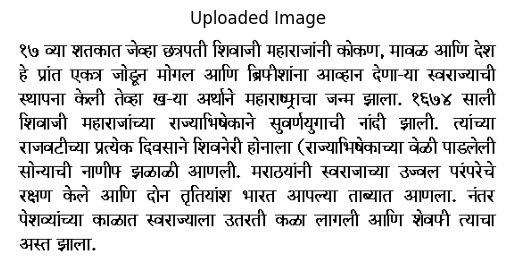


Final Output Summary:

Original Marathi OCR Text:
 १७ व्या शतकात जेव्हा छत्रपती शिवाजी महाराजांनी कोकण मावळ आणि देश हे प्रांत एकज जोडून मोगल आणि ब्रिपीशांना आव्हान देणा या स्वराज्याची स्थापना केली तेव्हा ख या अर्थाने महाराष्यराचा जन्म झाला ९६७४ साली शिवाजी महाराजांच्या राज्याभिषेकाने सुवर्णयुगाची नांदी झाली त्यांच्या राजबटीच्या प्रत्येक दिवसाने शिवनेरी होनाला राज्याभिषेकाच्या वेळी पाडलेली सोन्याची नाणीप झळाळी आणली मराठयांनी स्वराजाच्या उग्जल परंपरेचे रक्षण केले आणि दोन तृतियांश भारत आपल्या ताब्यात आणला नंतर पेशव्यांच्या काळात स्वराज्याला उत्तरती कळा लागली आणि शेबपी त्याचा अस्त झाला

Marathi to English Translation:
 In the 17th century, when Chhatrapati Shivaji Maharaj established the Konkan Maval and the country to challenge the Mughals and the British, Maharashtra was born in 9674 Shivaji Maharaj's coronation of the golden age. Protecting the tradition and two -thirds of India were taken into custody, after the Peshwa's time, Swarajya was responding and Sheeppi was dissolved.

Tokens

In [ ]:
# Display the image
plt.imshow(img_pil)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# Final Output
print("\nFinal Output Summary:\n")
print("Original Marathi OCR Text:\n", normalized_text) # OCR Marathi Text
print("\nMarathi to English Translation:\n", translation_text) # English Translated Text
print("\nTokens in Marathi:\n", tokens) # Marathi Tokens
print("\nTranslated Tokens in English:\n", translated_tokens) # English Tokens

In [ ]:
# Show tokens in tabular format
df = pd.DataFrame({'Marathi': tokens, 'English': translated_tokens})
df

,Marathi,English
0,१७,17
1,व्या,Th
2,शतकात,Centuries
3,जेव्हा,When
4,छत्रपती,Chhatrapati
...,...,...
72,आणि,And
73,शेबपी,Shabby
74,त्याचा,Its
75,अस्त,Weed


### Step 9: Sentiment Analysis

In [ ]:
# Sentiment Analysis

from transformers import pipeline

try:
    # Try Marathi sentiment analysis model (if available)
    sentiment_pipeline = pipeline("sentiment-analysis", model="l3cube-pune/MarathiSentiment")
    sentiment_result = sentiment_pipeline(normalized_text)
    print("\nMarathi Sentiment Analysis Result:\n", sentiment_result)

except:
    print("\nMarathi sentiment model failed or not available. Falling back to English sentiment analysis.")

    try:
        # Fallback: Use English-translated text and English sentiment model
        en_sentiment_pipeline = pipeline("sentiment-analysis")
        sentiment_result = en_sentiment_pipeline(translation_text)
        print("\nEnglish Sentiment Analysis Result:\n", sentiment_result)

    except Exception as e:
        print("\nSentiment analysis failed due to:", str(e))

config.json:   0%|          | 0.00/981 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/134M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/442 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

Device set to use cpu



Marathi Sentiment Analysis Result:
 [{'label': 'Neutral', 'score': 0.983304500579834}]


### Step 10: Summarize the Marathi and English text

In [ ]:
# Summarization using transformers pipeline
summarizer_mar = pipeline("summarization", model="Existance/mT5_multilingual_XLSum-marathi-summarization")
summarizer_en = pipeline("summarization", model="Falconsai/text_summarization")

try:
    marathi_summary = summarizer_mar(normalized_text, max_length=130, min_length=30, do_sample=False)
    print("\nMarathi Text Summary:\n", marathi_summary[0]["summary_text"])
except Exception as e:
    print(f"\nError summarizing Marathi text: {e}")

try:
    english_summary = summarizer_en(translation_text, max_length=130, min_length=30, do_sample=False)
    print("\nEnglish Text Summary:\n", english_summary[0]["summary_text"])
except Exception as e:
    print(f"\nError summarizing English text: {e}")

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 130, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)



Marathi Text Summary:
 मराठयांनी स्वराजाच्या उग्जल परंपरेचे रक्षण केले आणि दोन तृतियांश भारत आपल्या ताब्यात आणला नंतर पेशव्यांच्या काळात स्वराज्याला उत्तरती कळा लागली आता शेबपी त्याचा अस्त झाला
